In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("dataset.csv", low_memory=False)

In [3]:
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,FBI


## Treating data

For The initial treating of this dataset, there are things needed to be done:

1) Check data types;

2) Drop columns that will not be used;

3) Handle missing values;

4) Handle Outliers;

## Checking data types

The data type of perpetrator's age was not seen as int initially, so there was the need to treat those values and transform them to NaN (there is only one row with an NA value in 'Perpetrator Age').

In [4]:
df.dtypes

Record ID            int64
Agency Code         object
Agency Name         object
Agency Type         object
City                object
State               object
Year                 int64
Month               object
Incident             int64
Crime Type          object
Crime Solved        object
Victim Sex          object
Victim Age           int64
Victim Race         object
Perpetrator Sex     object
Perpetrator Age     object
Perpetrator Race    object
Relationship        object
Weapon              object
Record Source       object
dtype: object

In [5]:
df['Perpetrator Age'] = pd.to_numeric(df['Perpetrator Age'], errors='coerce').astype('Int64')
df.dtypes

Record ID            int64
Agency Code         object
Agency Name         object
Agency Type         object
City                object
State               object
Year                 int64
Month               object
Incident             int64
Crime Type          object
Crime Solved        object
Victim Sex          object
Victim Age           int64
Victim Race         object
Perpetrator Sex     object
Perpetrator Age      Int64
Perpetrator Race    object
Relationship        object
Weapon              object
Record Source       object
dtype: object

## Dropping columns

In [6]:
drop_columns = ['Agency Code', 'Record Source', 'Agency Type', 'Agency Name']
df = df.drop(columns = drop_columns)

In [7]:
df.head()

,Record ID,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon
0,1,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object
1,2,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation
2,3,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown
3,4,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation
4,5,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown


## Handling missing values

There was one value that was caught and recorded as NA in the 'Perpetrator Age' column. That value will we replaced with the mean value for that column.

In [8]:
# this counts the number of lines with NA values
nan_counts = df.isna().sum()
nan_counts

Record ID           0
City                0
State               0
Year                0
Month               0
Incident            0
Crime Type          0
Crime Solved        0
Victim Sex          0
Victim Age          0
Victim Race         0
Perpetrator Sex     0
Perpetrator Age     1
Perpetrator Race    0
Relationship        0
Weapon              0
dtype: int64

In [9]:
# this drops values that are defined as 'NA'
df.dropna(inplace=True)
nan_counts

Record ID           0
City                0
State               0
Year                0
Month               0
Incident            0
Crime Type          0
Crime Solved        0
Victim Sex          0
Victim Age          0
Victim Race         0
Perpetrator Sex     0
Perpetrator Age     1
Perpetrator Race    0
Relationship        0
Weapon              0
dtype: int64

In [64]:
df.drop(df[(df == 'Unknown').any(axis=1)].index, inplace=True)

In [65]:
df

,Record ID,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Normalized Victim Age,Normalized Perpetrator Age,Z-Score Victim Age,Z-Score Perpetrator Age,Robust Scaler Victim Age,Robust Scaler Perpetrator Age,Month_Year
0,1,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,0.141414,0.151515,12.112623,13.863819,-0.842105,-0.193548,1980-01-01
1,2,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0.434343,0.424242,41.112623,40.863819,0.684211,0.677419,1980-03-01
3,4,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0.434343,0.424242,41.112623,40.863819,0.684211,0.677419,1980-04-01
5,6,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,Yes,Male,30,White,Male,36,White,Acquaintance,Rifle,0.303030,0.363636,28.112623,34.863819,0.000000,0.483871,1980-05-01
6,7,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,Yes,Female,42,Native American/Alaska Native,Male,27,Black,Wife,Knife,0.424242,0.272727,40.112623,25.863819,0.631579,0.193548,1980-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638448,638449,Natrona,Wyoming,2014,August,1,Murder or Manslaughter,Yes,Male,29,Native American/Alaska Native,Male,67,Black,Friend,Firearm,0.292929,0.676768,27.112623,65.863819,-0.052632,1.483871,2014-08-01
638450,638451,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,Yes,Male,62,White,Male,57,White,Acquaintance,Handgun,0.626263,0.575758,60.112623,55.863819,1.684211,1.161290,2014-06-01
638451,638452,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Female,22,Asian/Pacific Islander,Daughter,Suffocation,0.000000,0.222222,-1.887377,20.863819,-1.578947,0.032258,2014-09-01
638452,638453,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,Yes,Male,55,White,Male,31,White,Stranger,Knife,0.555556,0.313131,53.112623,29.863819,1.315789,0.322581,2014-12-01


## Handling Outliers

To handle outliers we can use some plots to first identify them, and then do something about it.

I will use Histograms for the numerical data.

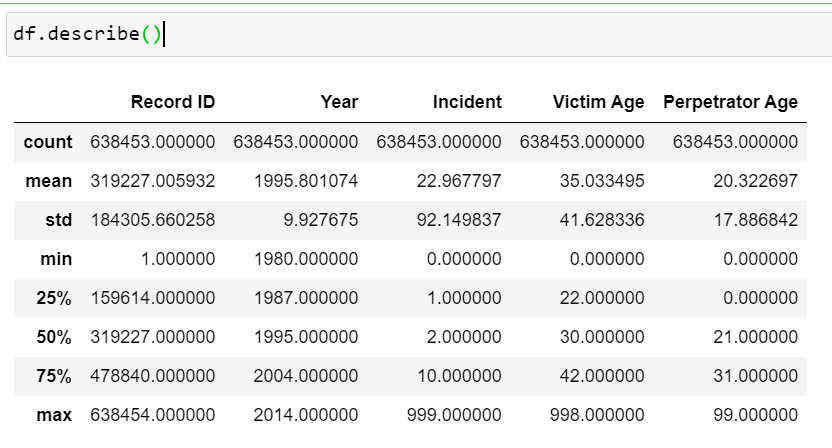

## Victim Age

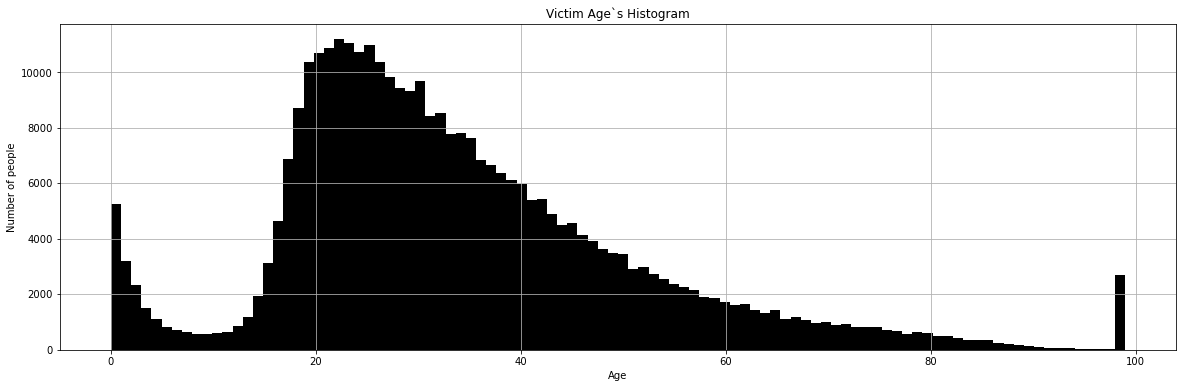

In [67]:
plt.figure(figsize=(20,6))
plt.hist(df['Victim Age'], bins=100, color='black')
plt.title('Victim Age`s Histogram')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.grid(True)
plt.show()

In [68]:
above_100 = (df['Victim Age'] == 998).sum()
above_100

0

For 'Victim Age' we can see that there are some entries in the 1000 years range (there are 974 values equals to 998 years old). To handle those, we would first replace these values with NA, and then transform those in the median values.

In [69]:
df['Victim Age'] = df['Victim Age'].replace(998, pd.NA)
victim_age_median = df['Victim Age'].median()
df['Victim Age'].fillna(victim_age_median, inplace=True)
df['Victim Age'] = df['Victim Age'].astype('int64')

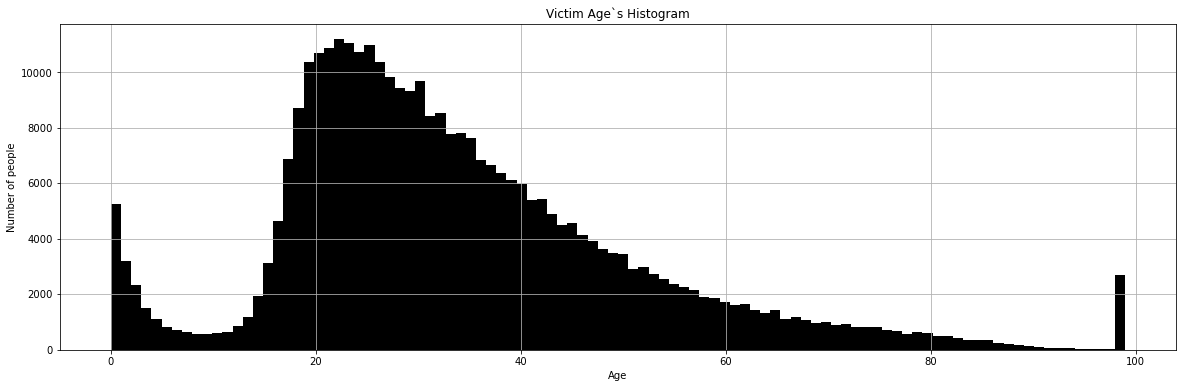

In [71]:
# New plot, without wrong values
plt.figure(figsize=(20,6))
plt.hist(df['Victim Age'], bins=100, color='black')
plt.title('Victim Age`s Histogram')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.grid(True)
plt.show()

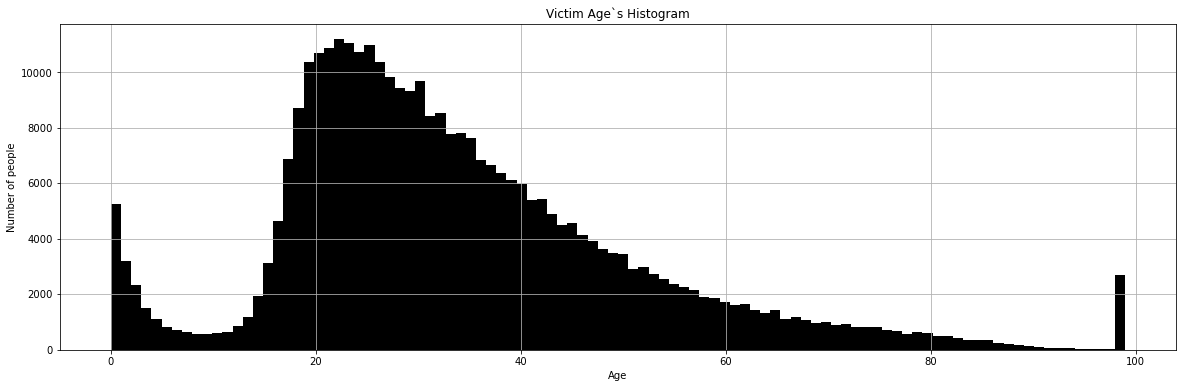

In [72]:
plt.figure(figsize=(20,6))
plt.hist(df['Victim Age'], bins=100, color='black')
plt.title('Victim Age`s Histogram')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.grid(True)
plt.show()

Also there is an unusual concentration of 99 years old victims in this graph, which makes me question how legit this data can be when so many are just outliering. But when I treat this data another anomally happens: The Median Age suffers a spike.

## Perpetrator Age

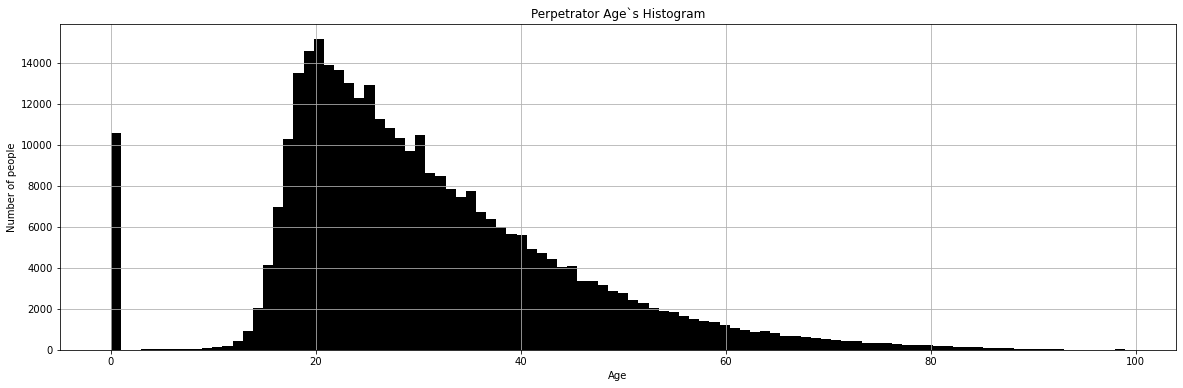

In [74]:
plt.figure(figsize=(20,6))
plt.hist(df['Perpetrator Age'], bins=100, color= 'black')
plt.title('Perpetrator Age`s Histogram')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.grid(True)
plt.show()

When it comes to 'Perpetrator's Age' we have many values being 0, representing the Age is unknown. I will keep them as it is because if I transform them in NA values, that will transform this column in 'object' instead of 'int64' when in comes to data types.

In [16]:
df.dtypes

Record ID            int64
City                object
State               object
Year                 int64
Month               object
Incident             int64
Crime Type          object
Crime Solved        object
Victim Sex          object
Victim Age           int64
Victim Race         object
Perpetrator Sex     object
Perpetrator Age      Int64
Perpetrator Race    object
Relationship        object
Weapon              object
dtype: object

_______________________________________

## Tasks

a) Identify which variables are categorical, discrete and continuous in the chosen data set and show
using some visualization or plot. Explore whether there are missing values for any of the variables.

b) Calculate the statistical parameters (mean, median, minimum, maximum, and standard deviation)
for each of the numerical variables.

c) Apply Min-Max Normalization, Z-score Standardization and Robust scalar on the numerical data
variables.

d) Line, Scatter and Heatmaps can be used to show the correlation between the features of the
dataset.

e) Graphics and descriptive understanding should be provided along with Data Exploratory analysis
(EDA). Identify subgroups of features that can explore some interesting facts.

f) Apply dummy encoding to categorical variables (at least one variable used from the data set) and
discuss the benefits of dummy encoding to understand the categorical data.

g) Apply PCA with your chosen number of components. Write up a short profile of the first few
components extracted based on your understanding.

h) What is the purpose of dimensionality reduction? Explore the situations where you can gain the
benefit of dimensionality reduction for data analysis.

-----------------

# a) Identifying variables, showing visualisations and acknowledging the existence of missing values 

### Categorical:
These variables are not numerical and are identified based on their names, while grouped together. They are divided into Nominal and Ordinal data. In this dataset there are no ordinal variables and all the 'object' (according to data types) columns are categorical. 

Columns that are categorical: Agency Code, Agency Name, Agency Type, City, State, Month, Incident, Crime Type, Crime Solved, Victim Sex, Victim Race, Perpetrator Sex, Perpetrator Race, Relationship, Weapon, Record Source.

### Discrete:
Discrete values are the ones that can be counted and have a limited number of answers/values. 

The columns that have discrete values are: Record ID, Year, Incident, Victim Age, Perpetrator Age.

### Continuous:
Those are values that can take infinite numbers of values within a range. None of the columns in this dataset have this type of values.

### Missing Values:
In this dataset there was only one missing value (on 'Perpetrator Age') and because there was no other missing values and the deletion of one line would not impose a threat to misrepresent the data, the line was dropped. in the "Handling missing values" section above.

_____________________

# b) Calculate the Statistical Parameters for the numerical values

That can be done in python with the .describe() function, but I also did a breakdown below for a beter visualisation of the data that I considered interesting to analyse (Victim Age and Perpetrator Age).

In [17]:
df.describe()

,Record ID,Year,Incident,Victim Age,Perpetrator Age
count,638453.000000,638453.000000,638453.000000,638453.000000,638453.000000
mean,319227.005932,1995.801074,22.967797,33.556750,20.322697
std,184305.660258,9.927675,92.149837,17.779568,17.886842
min,1.000000,1980.000000,0.000000,0.000000,0.000000
25%,159614.000000,1987.000000,1.000000,22.000000,0.000000
50%,319227.000000,1995.000000,2.000000,30.000000,21.000000
75%,478840.000000,2004.000000,10.000000,41.000000,31.000000
max,638454.000000,2014.000000,999.000000,99.000000,99.000000


## Mean Calculation

In [18]:
victim_age_mean = df['Victim Age'].mean()
perpetrator_age_mean = df['Perpetrator Age'].mean()

## Mean Values

In [19]:
print("The mean for the Victim Age values is: ", victim_age_mean)
print("The mean for the Year values is: ", perpetrator_age_mean)

The mean for the Victim Age values is:  33.556750457747086
The mean for the Year values is:  20.32269720715542


## Median calculation

In [20]:
victim_age_median = df['Victim Age'].median()
perpetrator_age_median = df['Perpetrator Age'].median()

## Median Values

In [21]:
print("The median for the Victim Age values is: ", victim_age_median)
print("The median for the Year values is: ", perpetrator_age_median)

The median for the Victim Age values is:  30.0
The median for the Year values is:  21.0


## Minimum and Maximum Values Calculation

In [22]:
minimum_year = df['Year'].min()
maximum_year = df['Year'].max()

minimum_victim_age = df['Victim Age'].min()
maximum_victim_age = df['Victim Age'].max()

minimum_perpetrator_age = df['Perpetrator Age'].min()
maximum_perpetrator_age = df['Perpetrator Age'].max()

## Minimum and Maximum Values

In [23]:
print("This dataset starts in ", minimum_year, "and finishes at ", maximum_year)
print("The youngest victims were ", minimum_victim_age, " years old, and the oldest", maximum_victim_age)
print("The youngest perpetrators were", minimum_perpetrator_age, "and the oldest were", maximum_perpetrator_age)

This dataset starts in  1980 and finishes at  2014
The youngest victims were  0  years old, and the oldest 99
The youngest perpetrators were 0 and the oldest were 99


## Standard Deviation


In [24]:
victim_age_std = df['Victim Age'].std()
perpetrator_age_std = df['Perpetrator Age'].std()

In [25]:
print("The Victim Age's Standard Deviation is: ", victim_age_std)
print("The Perpetrator Age's Standard Deviation is: ", perpetrator_age_std)

The Victim Age's Standard Deviation is:  17.779567538933204
The Perpetrator Age's Standard Deviation is:  17.88684181199938


____________


# c) Min-Max Normalisation, Z-score Standardisation and Robust Scaler

## Min-Max Normalization

For this calculation we have the following formula:

X* = X - min(X)/ max(X) - min(X)


In [26]:
df['Normalized Victim Age'] = (df['Victim Age'] - minimum_victim_age) / (maximum_victim_age - minimum_victim_age)
df['Normalized Perpetrator Age'] = (df['Perpetrator Age'] - minimum_perpetrator_age) / (maximum_perpetrator_age - minimum_perpetrator_age)

In [27]:
df.head()

,Record ID,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Normalized Victim Age,Normalized Perpetrator Age
0,1,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,0.141414,0.151515
1,2,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0.434343,0.424242
2,3,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,0.303030,0.0
3,4,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0.434343,0.424242
4,5,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,0.303030,0.0


## Z-Score

For this calculation we use the formula: X* = X - Mean(X) / Standard_Deviation(X)

In [28]:
df['Z-Score Victim Age'] = (df['Victim Age'] - victim_age_mean / victim_age_std)
df['Z-Score Perpetrator Age'] = (df['Perpetrator Age'] - perpetrator_age_mean / perpetrator_age_std)

In [29]:
df.head()

,Record ID,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Normalized Victim Age,Normalized Perpetrator Age,Z-Score Victim Age,Z-Score Perpetrator Age
0,1,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,0.141414,0.151515,12.112623,13.863819
1,2,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0.434343,0.424242,41.112623,40.863819
2,3,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,0.303030,0.0,28.112623,-1.136181
3,4,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0.434343,0.424242,41.112623,40.863819
4,5,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,0.303030,0.0,28.112623,-1.136181


## Robust Scaler

In [30]:
scaler = RobustScaler()
df['Robust Scaler Victim Age'] = scaler.fit_transform(df[['Victim Age']])
df['Robust Scaler Perpetrator Age'] = scaler.fit_transform(df[['Perpetrator Age']])

In [31]:
df.head()

,Record ID,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,...,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Normalized Victim Age,Normalized Perpetrator Age,Z-Score Victim Age,Z-Score Perpetrator Age,Robust Scaler Victim Age,Robust Scaler Perpetrator Age
0,1,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,...,15,Native American/Alaska Native,Acquaintance,Blunt Object,0.141414,0.151515,12.112623,13.863819,-0.842105,-0.193548
1,2,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,...,42,White,Acquaintance,Strangulation,0.434343,0.424242,41.112623,40.863819,0.684211,0.677419
2,3,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,...,0,Unknown,Unknown,Unknown,0.303030,0.0,28.112623,-1.136181,0.000000,-0.677419
3,4,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,...,42,White,Acquaintance,Strangulation,0.434343,0.424242,41.112623,40.863819,0.684211,0.677419
4,5,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,...,0,Unknown,Unknown,Unknown,0.303030,0.0,28.112623,-1.136181,0.000000,-0.677419


_______________


# d) Line, Scatter and Heatmaps

### Perpetrator genders over the years

In [32]:
df['Year'] = pd.Categorical(df['Year'])
group_year_gender = df.groupby(['Year', 'Perpetrator Sex']).size().unstack(fill_value = 0)
group_year_gender

Perpetrator Sex,Female,Male,Unknown
Year,,,
1980,2331,14398,6363
1981,2208,13580,5420
1982,2113,12947,5484
1983,2107,12408,5138
1984,1799,11446,4848
1985,1797,11826,4763
1986,1950,12870,5305
1987,1745,11728,5310
1988,1618,11773,5388


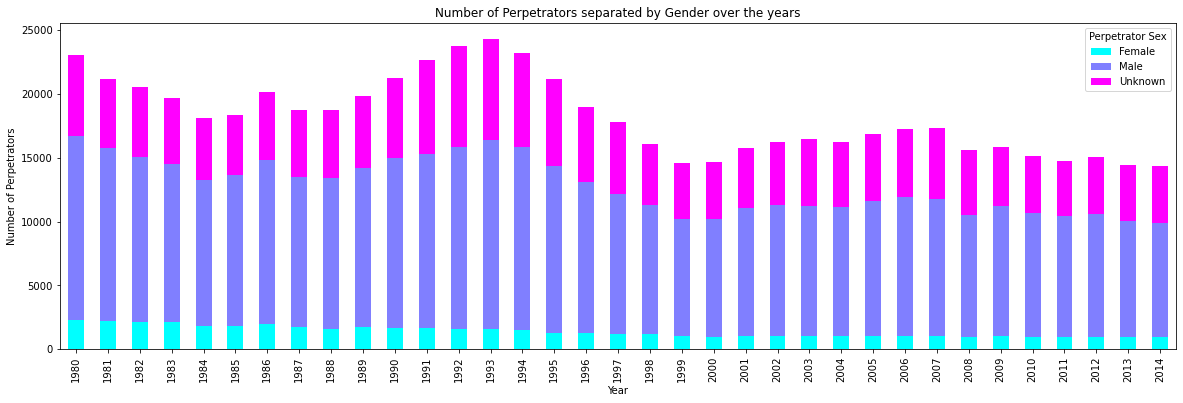

In [33]:
fig, ax = plt.subplots(figsize=(20,6))
group_year_gender.plot(kind = 'bar', stacked=True, ax=ax, colormap='cool')
plt.title('Number of Perpetrators separated by Gender over the years')
plt.xlabel('Year')
plt.ylabel('Number of Perpetrators')
plt.legend(title='Perpetrator Sex')
plt.show();

### Month with more homicides over the years

In [34]:
df['Month_Year'] = df['Month'] + ' ' + df['Year'].astype(str)
df['Month_Year'] = pd.to_datetime(df['Month_Year'], format='%B %Y')

# This counts the incidents of homicide of each month of each year
higher_month = df.groupby(['Year', 'Month']).size().reset_index(name='Number of Homicides')

# idxmax() displays the first result of each month
higher_month_per_year = higher_month.loc[higher_month.groupby('Year')['Number of Homicides'].idxmax()]

# Here I just reseted the index to look better
higher_month_per_year = higher_month_per_year.reset_index(drop=True)

higher_month_per_year

,Year,Month,Number of Homicides
0,1980,August,2371
1,1981,January,1987
2,1982,August,1832
3,1983,December,1913
4,1984,December,1699
5,1985,August,1707
6,1986,July,1938
7,1987,July,1672
8,1988,August,1789
9,1989,July,1804


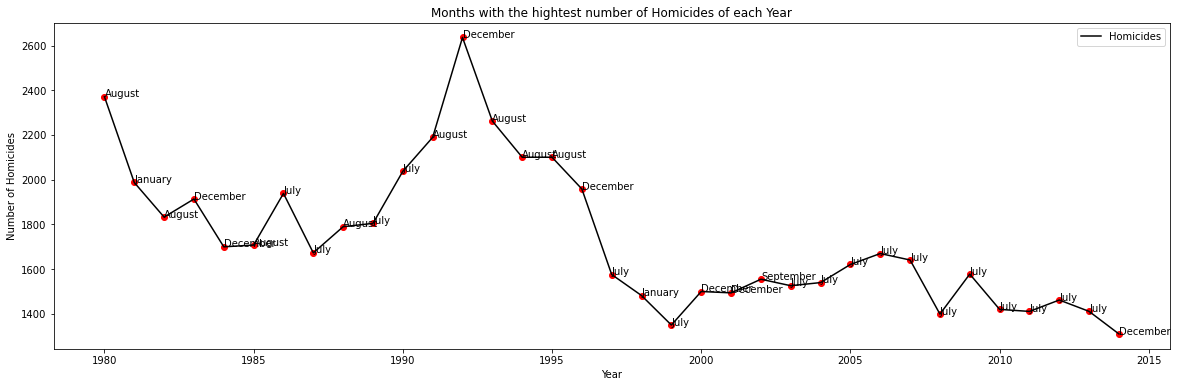

In [35]:
fig, ax = plt.subplots(figsize=(20,6))
plt.plot(higher_month_per_year['Year'], higher_month_per_year['Number of Homicides'], linestyle='-', color='black', label='Homicides')
plt.scatter(higher_month_per_year['Year'], higher_month_per_year['Number of Homicides'], color='red')

# Code to generate notation on each dot
for i, txt in enumerate(higher_month_per_year['Month']):
    plt.annotate(txt, (higher_month_per_year.loc[i, 'Year'], higher_month_per_year.loc[i, 'Number of Homicides']))
    
plt.title('Months with the hightest number of Homicides of each Year')
plt.xlabel('Year')
plt.ylabel('Number of Homicides')
plt.legend()
plt.show()

### Weapon Variety according to relationship

In [36]:
weapon_counts = df['Weapon'].value_counts()
weapon_counts

Handgun          317483
Knife             94962
Blunt Object      67337
Firearm           46980
Unknown           33192
Shotgun           30722
Rifle             23347
Strangulation      8110
Fire               6173
Suffocation        3968
Gun                2206
Drugs              1588
Drowning           1204
Explosives          537
Poison              454
Fall                190
Name: Weapon, dtype: int64

In [37]:
relationship_counts = df['Relationship'].value_counts()
relationship_counts

Unknown                 273012
Acquaintance            126018
Stranger                 96593
Wife                     23187
Friend                   21945
Girlfriend               16465
Son                       9904
Family                    9535
Husband                   8803
Daughter                  7539
Boyfriend                 7302
Neighbor                  6294
Brother                   5514
Father                    4361
Mother                    4248
In-Law                    3637
Common-Law Wife           2477
Ex-Wife                   1973
Common-Law Husband        1954
Boyfriend/Girlfriend      1383
Stepfather                1360
Sister                    1292
Stepson                   1170
Stepdaughter               754
Ex-Husband                 629
Employer                   509
Employee                   384
Stepmother                 211
Name: Relationship, dtype: int64

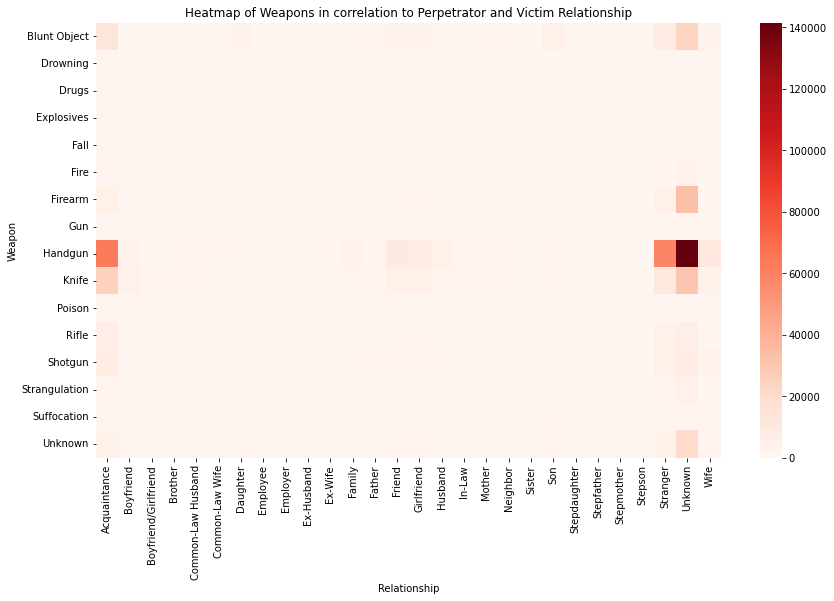

In [38]:
cross_tab = pd.crosstab(df['Weapon'], df['Relationship'])
plt.figure(figsize=(14,8))
sns.heatmap(cross_tab, cmap='Reds', cbar=True)
plt.title('Heatmap of Weapons in correlation to Perpetrator and Victim Relationship')
plt.xlabel('Relationship')
plt.ylabel('Weapon')
plt.show()

By Observing and running each time a new exclusion was mayde, I made this graph more heated by excluding categories that did not represent many of the occurrences

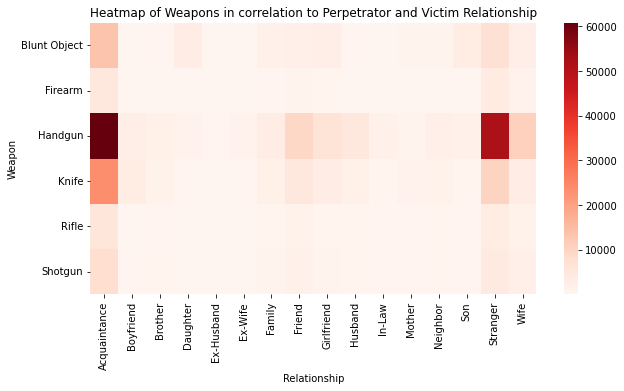

In [78]:
filtered_df = df[(df['Weapon'] != 'Drowning') & (df['Weapon'] != 'Drugs') & (df['Weapon'] != 'Explosives')
                 & (df['Weapon'] != 'Strangulation') & (df['Weapon'] != 'Suffocation') & (df['Weapon'] != 'Gun')
                 & (df['Weapon'] != 'Poison') & (df['Weapon'] != 'Fall') & (df['Weapon'] != 'Fire') 
                 & (df['Relationship'] != 'Boyfriend/Girlfriend') & (df['Relationship'] != 'Common-Law Husband')
                & (df['Relationship'] != 'Stepfather') & (df['Relationship'] != 'Stepmother') 
                 & (df['Relationship'] != 'Employee') & (df['Relationship'] != 'Employer')
                & (df['Relationship'] != 'Father') & (df['Relationship'] != 'Sister')
                & (df['Relationship'] != 'Stepdaughter') & (df['Relationship'] != 'Stepson')
                & (df['Relationship'] != 'Common-Law Wife')]

cross_tab = pd.crosstab(filtered_df['Weapon'], filtered_df['Relationship'])
plt.figure(figsize=(10,5))
sns.heatmap(cross_tab, cmap='Reds', cbar=True)
plt.title('Heatmap of Weapons in correlation to Perpetrator and Victim Relationship')
plt.xlabel('Relationship')
plt.ylabel('Weapon')
plt.show()

There is not much difference, just that stranger became the second most 'popular' category of relationships.

___________________________________

# e) Data Exploratory Analysis 

What are the questions I want to answer with this EDA? 

____________________________

# f) Dummy Coding

Here we will do Dummy Encoding to have Seasons. 

In [40]:
# month_order = {'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']}

# month_dummies = pd.get_dummies(df['Month'], prefix='Month')

# season_mapping = {
#     'January': 'Winter', 'February': 'Winter', 'March': 'Spring',
#     'April': 'Spring', 'May': 'Spring', 'June': 'Summer',
#     'July': 'Summer', 'August': 'Summer', 'September': 'Autumn',
#     'October': 'Autumn', 'November': 'Autumn', 'December': 'Winter'
# }

# df['Season'] = df['Month'].map(season_mapping)

# df_encoded= pd.get_dummies(df, columns=['Season'], prefix='Season')

# df_encoded

In [44]:
df

,Record ID,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,...,Perpetrator Race,Relationship,Weapon,Normalized Victim Age,Normalized Perpetrator Age,Z-Score Victim Age,Z-Score Perpetrator Age,Robust Scaler Victim Age,Robust Scaler Perpetrator Age,Month_Year
0,1,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,...,Native American/Alaska Native,Acquaintance,Blunt Object,0.141414,0.151515,12.112623,13.863819,-0.842105,-0.193548,1980-01-01
1,2,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,...,White,Acquaintance,Strangulation,0.434343,0.424242,41.112623,40.863819,0.684211,0.677419,1980-03-01
2,3,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,...,Unknown,Unknown,Unknown,0.303030,0.0,28.112623,-1.136181,0.000000,-0.677419,1980-03-01
3,4,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,...,White,Acquaintance,Strangulation,0.434343,0.424242,41.112623,40.863819,0.684211,0.677419,1980-04-01
4,5,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,...,Unknown,Unknown,Unknown,0.303030,0.0,28.112623,-1.136181,0.000000,-0.677419,1980-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,Park,Wyoming,2014,January,1,Murder or Manslaughter,No,Male,30,...,Unknown,Unknown,Handgun,0.303030,0.0,28.112623,-1.136181,0.000000,-0.677419,2014-01-01
638450,638451,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,Yes,Male,62,...,White,Acquaintance,Handgun,0.626263,0.575758,60.112623,55.863819,1.684211,1.161290,2014-06-01
638451,638452,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0,...,Asian/Pacific Islander,Daughter,Suffocation,0.000000,0.222222,-1.887377,20.863819,-1.578947,0.032258,2014-09-01
638452,638453,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,Yes,Male,55,...,White,Stranger,Knife,0.555556,0.313131,53.112623,29.863819,1.315789,0.322581,2014-12-01


In [50]:
df_encoded = pd.get_dummies(df, columns=['Crime Type', 'Victim Sex', 'Perpetrator Sex','Relationship'], prefix= ['Crime Type', 'Victim Sex', 'Perpetrator Sex', 'Relationship'])
pd.set_option('display.max_columns', None)
df_encoded.head()

,Record ID,City,State,Year,Month,Incident,Crime Solved,Victim Age,Victim Race,Perpetrator Age,Perpetrator Race,Weapon,Normalized Victim Age,Normalized Perpetrator Age,Z-Score Victim Age,Z-Score Perpetrator Age,Robust Scaler Victim Age,Robust Scaler Perpetrator Age,Month_Year,Crime Type_Manslaughter by Negligence,Crime Type_Murder or Manslaughter,Victim Sex_Female,Victim Sex_Male,Victim Sex_Unknown,Perpetrator Sex_Female,Perpetrator Sex_Male,Perpetrator Sex_Unknown,Relationship_Acquaintance,Relationship_Boyfriend,Relationship_Boyfriend/Girlfriend,Relationship_Brother,Relationship_Common-Law Husband,Relationship_Common-Law Wife,Relationship_Daughter,Relationship_Employee,Relationship_Employer,Relationship_Ex-Husband,Relationship_Ex-Wife,Relationship_Family,Relationship_Father,Relationship_Friend,Relationship_Girlfriend,Relationship_Husband,Relationship_In-Law,Relationship_Mother,Relationship_Neighbor,Relationship_Sister,Relationship_Son,Relationship_Stepdaughter,Relationship_Stepfather,Relationship_Stepmother,Relationship_Stepson,Relationship_Stranger,Relationship_Unknown,Relationship_Wife
0,1,Anchorage,Alaska,1980,January,1,Yes,14,Native American/Alaska Native,15,Native American/Alaska Native,Blunt Object,0.141414,0.151515,12.112623,13.863819,-0.842105,-0.193548,1980-01-01,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Anchorage,Alaska,1980,March,1,Yes,43,White,42,White,Strangulation,0.434343,0.424242,41.112623,40.863819,0.684211,0.677419,1980-03-01,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Anchorage,Alaska,1980,March,2,No,30,Native American/Alaska Native,0,Unknown,Unknown,0.303030,0.0,28.112623,-1.136181,0.000000,-0.677419,1980-03-01,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,Anchorage,Alaska,1980,April,1,Yes,43,White,42,White,Strangulation,0.434343,0.424242,41.112623,40.863819,0.684211,0.677419,1980-04-01,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Anchorage,Alaska,1980,April,2,No,30,Native American/Alaska Native,0,Unknown,Unknown,0.303030,0.0,28.112623,-1.136181,0.000000,-0.677419,1980-04-01,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [42]:
df

,Record ID,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,...,Perpetrator Race,Relationship,Weapon,Normalized Victim Age,Normalized Perpetrator Age,Z-Score Victim Age,Z-Score Perpetrator Age,Robust Scaler Victim Age,Robust Scaler Perpetrator Age,Month_Year
0,1,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,...,Native American/Alaska Native,Acquaintance,Blunt Object,0.141414,0.151515,12.112623,13.863819,-0.842105,-0.193548,1980-01-01
1,2,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,...,White,Acquaintance,Strangulation,0.434343,0.424242,41.112623,40.863819,0.684211,0.677419,1980-03-01
2,3,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,...,Unknown,Unknown,Unknown,0.303030,0.0,28.112623,-1.136181,0.000000,-0.677419,1980-03-01
3,4,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,...,White,Acquaintance,Strangulation,0.434343,0.424242,41.112623,40.863819,0.684211,0.677419,1980-04-01
4,5,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,...,Unknown,Unknown,Unknown,0.303030,0.0,28.112623,-1.136181,0.000000,-0.677419,1980-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,Park,Wyoming,2014,January,1,Murder or Manslaughter,No,Male,30,...,Unknown,Unknown,Handgun,0.303030,0.0,28.112623,-1.136181,0.000000,-0.677419,2014-01-01
638450,638451,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,Yes,Male,62,...,White,Acquaintance,Handgun,0.626263,0.575758,60.112623,55.863819,1.684211,1.161290,2014-06-01
638451,638452,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0,...,Asian/Pacific Islander,Daughter,Suffocation,0.000000,0.222222,-1.887377,20.863819,-1.578947,0.032258,2014-09-01
638452,638453,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,Yes,Male,55,...,White,Stranger,Knife,0.555556,0.313131,53.112623,29.863819,1.315789,0.322581,2014-12-01


__________________

# g) Principal Component Analysis

_______________________

# h) Dimensionality Reduction: Purpose and Benefits